In [1]:
print(2)

2


In [9]:
pip install keras scikit-learn


Defaulting to user installation because normal site-packages is not writeableNote: you may need to restart the kernel to use updated packages.



In [10]:
pip install tensorflow


Defaulting to user installation because normal site-packages is not writeable
Note: you may need to restart the kernel to use updated packages.


In [30]:
import numpy as np
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler, OneHotEncoder
from sklearn.impute import SimpleImputer
from sklearn.compose import ColumnTransformer
from sklearn.pipeline import Pipeline
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, Conv1D, MaxPooling1D, Flatten
from tensorflow.keras.callbacks import EarlyStopping

# Load the dataset
df = pd.read_csv('C:/Users/hp/Downloads/healthcare-dataset-stroke-data.csv')

# Separate features and target variable
X = df.drop(columns=['stroke'])
y = df['stroke']

# Split the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Define preprocessing steps
numeric_features = X.select_dtypes(include=['int64', 'float64']).columns
categorical_features = X.select_dtypes(include=['object']).columns

numeric_transformer = Pipeline(steps=[
    ('imputer', SimpleImputer(strategy='mean')),
    ('scaler', StandardScaler())
])

categorical_transformer = Pipeline(steps=[
    ('imputer', SimpleImputer(strategy='most_frequent')),
    ('onehot', OneHotEncoder(handle_unknown='ignore'))
])

preprocessor = ColumnTransformer(
    transformers=[
        ('num', numeric_transformer, numeric_features),
        ('cat', categorical_transformer, categorical_features)
    ]
)

# Apply preprocessing to the data
X_train_preprocessed = preprocessor.fit_transform(X_train)
X_test_preprocessed = preprocessor.transform(X_test)

# Reshape data for CNN (samples, time steps, features)
X_train_reshaped = X_train_preprocessed.reshape(X_train_preprocessed.shape[0], 1, X_train_preprocessed.shape[1])
X_test_reshaped = X_test_preprocessed.reshape(X_test_preprocessed.shape[0], 1, X_test_preprocessed.shape[1])

# Build the CNN model
model_cnn = Sequential([
    Conv1D(filters=64, kernel_size=3, activation='relu', input_shape=(X_train_reshaped.shape[1], X_train_reshaped.shape[2])),
    MaxPooling1D(pool_size=2),
    Flatten(),
    Dense(32, activation='relu'),
    Dense(1, activation='sigmoid')
])

# Compile the CNN model
model_cnn.compile(optimizer='adam', loss='binary_crossentropy', metrics=['accuracy'])

# Define early stopping to prevent overfitting
early_stopping = EarlyStopping(monitor='val_loss', patience=3)

# Train the CNN model
model_cnn.fit(X_train_reshaped, y_train, epochs=30, batch_size=32, validation_split=0.1, callbacks=[early_stopping])

# Evaluate the CNN model
loss_cnn, accuracy_cnn = model_cnn.evaluate(X_test_reshaped, y_test)
print("CNN Test Accuracy:", accuracy_cnn)


C:\Users\hp\AppData\Roaming\Python\Python311\site-packages\keras\src\layers\convolutional\base_conv.py:99: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(


ValueError: Computed output size would be negative. Received `inputs shape=(None, 1, 21)`, `kernel shape=(3, 21, 64)`, `dilation_rate=[1]`.

In [31]:
import numpy as np
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler, OneHotEncoder
from sklearn.impute import SimpleImputer
from sklearn.compose import ColumnTransformer
from sklearn.pipeline import Pipeline
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, Conv1D, MaxPooling1D, Flatten
from tensorflow.keras.callbacks import EarlyStopping

# Load the dataset
df = pd.read_csv('C:/Users/hp/Downloads/healthcare-dataset-stroke-data.csv')

# Separate features and target variable
X = df.drop(columns=['stroke'])
y = df['stroke']

# Split the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Define preprocessing steps
numeric_features = X.select_dtypes(include=['int64', 'float64']).columns
categorical_features = X.select_dtypes(include=['object']).columns

numeric_transformer = Pipeline(steps=[
    ('imputer', SimpleImputer(strategy='mean')),
    ('scaler', StandardScaler())
])

categorical_transformer = Pipeline(steps=[
    ('imputer', SimpleImputer(strategy='most_frequent')),
    ('onehot', OneHotEncoder(handle_unknown='ignore'))
])

preprocessor = ColumnTransformer(
    transformers=[
        ('num', numeric_transformer, numeric_features),
        ('cat', categorical_transformer, categorical_features)
    ]
)

# Apply preprocessing to the data
X_train_preprocessed = preprocessor.fit_transform(X_train)
X_test_preprocessed = preprocessor.transform(X_test)

# Reshape data for CNN (samples, time steps, features)
X_train_reshaped = X_train_preprocessed.reshape(X_train_preprocessed.shape[0], X_train_preprocessed.shape[1], 1)
X_test_reshaped = X_test_preprocessed.reshape(X_test_preprocessed.shape[0], X_test_preprocessed.shape[1], 1)

# Build the CNN model
model_cnn = Sequential([
    Conv1D(filters=64, kernel_size=3, activation='relu', input_shape=(X_train_reshaped.shape[1], 1)),
    MaxPooling1D(pool_size=2),
    Flatten(),
    Dense(32, activation='relu'),
    Dense(1, activation='sigmoid')
])

# Compile the CNN model
model_cnn.compile(optimizer='adam', loss='binary_crossentropy', metrics=['accuracy'])

# Define early stopping to prevent overfitting
early_stopping = EarlyStopping(monitor='val_loss', patience=3)

# Train the CNN model
model_cnn.fit(X_train_reshaped, y_train, epochs=30, batch_size=32, validation_split=0.1, callbacks=[early_stopping])

# Evaluate the CNN model
loss_cnn, accuracy_cnn = model_cnn.evaluate(X_test_reshaped, y_test)
print("CNN Test Accuracy:", accuracy_cnn)


Epoch 1/30


C:\Users\hp\AppData\Roaming\Python\Python311\site-packages\keras\src\layers\convolutional\base_conv.py:99: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(


115/115 ━━━━━━━━━━━━━━━━━━━━ 1s 4ms/step - accuracy: 0.9023 - loss: 0.2886 - val_accuracy: 0.9487 - val_loss: 0.1805
Epoch 2/30
115/115 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.9520 - loss: 0.1752 - val_accuracy: 0.9487 - val_loss: 0.1699
Epoch 3/30
115/115 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.9536 - loss: 0.1634 - val_accuracy: 0.9487 - val_loss: 0.1633
Epoch 4/30
115/115 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.9512 - loss: 0.1646 - val_accuracy: 0.9487 - val_loss: 0.1620
Epoch 5/30
115/115 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.9532 - loss: 0.1561 - val_accuracy: 0.9487 - val_loss: 0.1566
Epoch 6/30
115/115 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - accuracy: 0.9505 - loss: 0.1620 - val_accuracy: 0.9487 - val_loss: 0.1585
Epoch 7/30
115/115 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - accuracy: 0.9547 - loss: 0.1547 - val_accuracy: 0.9487 - val_loss: 0.1564
Epoch 8/30
115/115 ━━━━━━━━━━━━━━━━━━━━ 1s 4ms/step - accuracy: 0.9571 - loss: 0.1435 - val_accuracy: 0.9487 - val_

In [32]:
from tensorflow.keras.layers import Concatenate, Dense, Conv1D, MaxPooling1D, Flatten, Input
from tensorflow.keras.models import Model
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler, OneHotEncoder
from sklearn.impute import SimpleImputer
from sklearn.compose import ColumnTransformer
from sklearn.pipeline import Pipeline
from sklearn.metrics import accuracy_score
import pandas as pd

# Load the dataset
df = pd.read_csv('C:/Users/hp/Downloads/healthcare-dataset-stroke-data.csv')

# Separate features and target variable
X = df.drop(columns=['stroke'])
y = df['stroke']

# Split the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Define preprocessing steps
numeric_features = X.select_dtypes(include=['int64', 'float64']).columns
categorical_features = X.select_dtypes(include=['object']).columns

numeric_transformer = Pipeline(steps=[
    ('imputer', SimpleImputer(strategy='mean')),
    ('scaler', StandardScaler())
])

categorical_transformer = Pipeline(steps=[
    ('imputer', SimpleImputer(strategy='most_frequent')),
    ('onehot', OneHotEncoder(handle_unknown='ignore'))
])

preprocessor = ColumnTransformer(
    transformers=[
        ('num', numeric_transformer, numeric_features),
        ('cat', categorical_transformer, categorical_features)
    ]
)

# Apply preprocessing to the data
X_train_preprocessed = preprocessor.fit_transform(X_train)
X_test_preprocessed = preprocessor.transform(X_test)

# Reshape data for CNN (samples, time steps, features)
X_train_reshaped = X_train_preprocessed.reshape(X_train_preprocessed.shape[0], X_train_preprocessed.shape[1], 1)
X_test_reshaped = X_test_preprocessed.reshape(X_test_preprocessed.shape[0], X_test_preprocessed.shape[1], 1)

# Define CNN model
cnn_input = Input(shape=(X_train_reshaped.shape[1], X_train_reshaped.shape[2]))
conv1 = Conv1D(filters=64, kernel_size=3, activation='relu')(cnn_input)
maxpool1 = MaxPooling1D(pool_size=2)(conv1)
flatten1 = Flatten()(maxpool1)

# Define DNN model
dnn_input = Input(shape=(X_train_preprocessed.shape[1],))
dense1 = Dense(64, activation='relu')(dnn_input)
dense2 = Dense(32, activation='relu')(dense1)

# Concatenate CNN and DNN outputs
concatenated = Concatenate()([flatten1, dense2])

# Additional dense layers
dense3 = Dense(64, activation='relu')(concatenated)
output = Dense(1, activation='sigmoid')(dense3)

# Combine both CNN and DNN models into a single model
hybrid_model = Model(inputs=[cnn_input, dnn_input], outputs=output)

# Compile the hybrid model
hybrid_model.compile(optimizer='adam', loss='binary_crossentropy', metrics=['accuracy'])

# Train the hybrid model
hybrid_model.fit([X_train_reshaped, X_train_preprocessed], y_train, epochs=30, batch_size=32, validation_split=0.1)

# Evaluate the hybrid model
loss, accuracy = hybrid_model.evaluate([X_test_reshaped, X_test_preprocessed], y_test)
print("Hybrid Model Test Accuracy:", accuracy)


Epoch 1/30
115/115 ━━━━━━━━━━━━━━━━━━━━ 2s 4ms/step - accuracy: 0.9409 - loss: 0.2386 - val_accuracy: 0.9487 - val_loss: 0.1663
Epoch 2/30
115/115 ━━━━━━━━━━━━━━━━━━━━ 1s 3ms/step - accuracy: 0.9552 - loss: 0.1516 - val_accuracy: 0.9487 - val_loss: 0.1526
Epoch 3/30
115/115 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.9544 - loss: 0.1511 - val_accuracy: 0.9487 - val_loss: 0.1545
Epoch 4/30
115/115 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.9523 - loss: 0.1530 - val_accuracy: 0.9487 - val_loss: 0.1497
Epoch 5/30
115/115 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.9532 - loss: 0.1474 - val_accuracy: 0.9487 - val_loss: 0.1613
Epoch 6/30
115/115 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - accuracy: 0.9541 - loss: 0.1464 - val_accuracy: 0.9487 - val_loss: 0.1671
Epoch 7/30
115/115 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.9520 - loss: 0.1558 - val_accuracy: 0.9487 - val_loss: 0.1580
Epoch 8/30
115/115 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.9590 - loss: 0.1275 - val_accuracy: 0.

In [35]:
from tensorflow.keras.layers import Concatenate, Dense, Conv1D, MaxPooling1D, Flatten, LSTM, Input, Reshape
from tensorflow.keras.models import Model
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler, OneHotEncoder
from sklearn.impute import SimpleImputer
from sklearn.compose import ColumnTransformer
from sklearn.pipeline import Pipeline
from sklearn.metrics import accuracy_score
import pandas as pd

# Load the dataset
df = pd.read_csv('C:/Users/hp/Downloads/healthcare-dataset-stroke-data.csv')

# Separate features and target variable
X = df.drop(columns=['stroke'])
y = df['stroke']

# Split the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Define preprocessing steps
numeric_features = X.select_dtypes(include=['int64', 'float64']).columns
categorical_features = X.select_dtypes(include=['object']).columns

numeric_transformer = Pipeline(steps=[
    ('imputer', SimpleImputer(strategy='mean')),
    ('scaler', StandardScaler())
])

categorical_transformer = Pipeline(steps=[
    ('imputer', SimpleImputer(strategy='most_frequent')),
    ('onehot', OneHotEncoder(handle_unknown='ignore'))
])

preprocessor = ColumnTransformer(
    transformers=[
        ('num', numeric_transformer, numeric_features),
        ('cat', categorical_transformer, categorical_features)
    ]
)

# Apply preprocessing to the data
X_train_preprocessed = preprocessor.fit_transform(X_train)
X_test_preprocessed = preprocessor.transform(X_test)

# Reshape data for CNN (samples, time steps, features)
X_train_reshaped = X_train_preprocessed.reshape(X_train_preprocessed.shape[0], X_train_preprocessed.shape[1], 1)
X_test_reshaped = X_test_preprocessed.reshape(X_test_preprocessed.shape[0], X_test_preprocessed.shape[1], 1)

# Define CNN model
cnn_input = Input(shape=(X_train_reshaped.shape[1], X_train_reshaped.shape[2]))
conv1 = Conv1D(filters=64, kernel_size=3, activation='relu')(cnn_input)
maxpool1 = MaxPooling1D(pool_size=2)(conv1)
flatten1 = Flatten()(maxpool1)

# Define LSTM model
lstm_input = Input(shape=(X_train_preprocessed.shape[1],))
lstm_reshaped = Reshape((X_train_preprocessed.shape[1], 1))(lstm_input)
lstm1 = LSTM(64)(lstm_reshaped)

# Concatenate CNN and LSTM outputs
concatenated = Concatenate()([flatten1, lstm1])

# Additional dense layers
dense1 = Dense(64, activation='relu')(concatenated)
dense2 = Dense(32, activation='relu')(dense1)
output = Dense(1, activation='sigmoid')(dense2)

# Combine both CNN and LSTM models into a single model
hybrid_model = Model(inputs=[cnn_input, lstm_input], outputs=output)

# Compile the hybrid model
hybrid_model.compile(optimizer='adam', loss='binary_crossentropy', metrics=['accuracy'])

# Train the hybrid model
hybrid_model.fit([X_train_reshaped, X_train_preprocessed], y_train, epochs=30, batch_size=32, validation_split=0.1)

# Evaluate the hybrid model
loss, accuracy = hybrid_model.evaluate([X_test_reshaped, X_test_preprocessed], y_test)
print("Hybrid Model Test Accuracy:", accuracy)


Epoch 1/30
115/115 ━━━━━━━━━━━━━━━━━━━━ 3s 10ms/step - accuracy: 0.9456 - loss: 0.2629 - val_accuracy: 0.9487 - val_loss: 0.1656
Epoch 2/30
115/115 ━━━━━━━━━━━━━━━━━━━━ 1s 8ms/step - accuracy: 0.9514 - loss: 0.1674 - val_accuracy: 0.9487 - val_loss: 0.1663
Epoch 3/30
115/115 ━━━━━━━━━━━━━━━━━━━━ 1s 8ms/step - accuracy: 0.9511 - loss: 0.1681 - val_accuracy: 0.9487 - val_loss: 0.1742
Epoch 4/30
115/115 ━━━━━━━━━━━━━━━━━━━━ 1s 8ms/step - accuracy: 0.9521 - loss: 0.1585 - val_accuracy: 0.9487 - val_loss: 0.1524
Epoch 5/30
115/115 ━━━━━━━━━━━━━━━━━━━━ 1s 8ms/step - accuracy: 0.9575 - loss: 0.1455 - val_accuracy: 0.9487 - val_loss: 0.1543
Epoch 6/30
115/115 ━━━━━━━━━━━━━━━━━━━━ 1s 8ms/step - accuracy: 0.9488 - loss: 0.1660 - val_accuracy: 0.9487 - val_loss: 0.1632
Epoch 7/30
115/115 ━━━━━━━━━━━━━━━━━━━━ 1s 8ms/step - accuracy: 0.9531 - loss: 0.1557 - val_accuracy: 0.9487 - val_loss: 0.1504
Epoch 8/30
115/115 ━━━━━━━━━━━━━━━━━━━━ 1s 9ms/step - accuracy: 0.9553 - loss: 0.1407 - val_accuracy: 0

In [36]:
from tensorflow.keras.layers import Concatenate, Dense, Conv1D, MaxPooling1D, Flatten, LSTM, Input, Reshape, Dropout
from tensorflow.keras.models import Model
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler, OneHotEncoder
from sklearn.impute import SimpleImputer
from sklearn.compose import ColumnTransformer
from sklearn.pipeline import Pipeline
import pandas as pd

# Load the dataset
df = pd.read_csv('C:/Users/hp/Downloads/healthcare-dataset-stroke-data.csv')

# Separate features and target variable
X = df.drop(columns=['stroke'])
y = df['stroke']

# Split the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Define preprocessing steps
numeric_features = X.select_dtypes(include=['int64', 'float64']).columns
categorical_features = X.select_dtypes(include=['object']).columns

numeric_transformer = Pipeline(steps=[
    ('imputer', SimpleImputer(strategy='mean')),
    ('scaler', StandardScaler())
])

categorical_transformer = Pipeline(steps=[
    ('imputer', SimpleImputer(strategy='most_frequent')),
    ('onehot', OneHotEncoder(handle_unknown='ignore'))
])

preprocessor = ColumnTransformer(
    transformers=[
        ('num', numeric_transformer, numeric_features),
        ('cat', categorical_transformer, categorical_features)
    ]
)

# Apply preprocessing to the data
X_train_preprocessed = preprocessor.fit_transform(X_train)
X_test_preprocessed = preprocessor.transform(X_test)

# Reshape data for CNN (samples, time steps, features)
X_train_reshaped = X_train_preprocessed.reshape(X_train_preprocessed.shape[0], X_train_preprocessed.shape[1], 1)
X_test_reshaped = X_test_preprocessed.reshape(X_test_preprocessed.shape[0], X_test_preprocessed.shape[1], 1)

# Define CNN model
cnn_input = Input(shape=(X_train_reshaped.shape[1], X_train_reshaped.shape[2]))
conv1 = Conv1D(filters=64, kernel_size=3, activation='relu')(cnn_input)
maxpool1 = MaxPooling1D(pool_size=2)(conv1)
flatten1 = Flatten()(maxpool1)

# Define LSTM model
lstm_input = Input(shape=(X_train_preprocessed.shape[1],))
lstm_reshaped = Reshape((X_train_preprocessed.shape[1], 1))(lstm_input)
lstm1 = LSTM(64)(lstm_reshaped)

# Concatenate CNN and LSTM outputs
concatenated = Concatenate()([flatten1, lstm1])

# Additional dense layers with dropout
dense1 = Dense(128, activation='relu')(concatenated)
dropout1 = Dropout(0.5)(dense1)
dense2 = Dense(64, activation='relu')(dropout1)
output = Dense(1, activation='sigmoid')(dense2)

# Combine both CNN and LSTM models into a single model
hybrid_model = Model(inputs=[cnn_input, lstm_input], outputs=output)

# Compile the hybrid model
hybrid_model.compile(optimizer='adam', loss='binary_crossentropy', metrics=['accuracy'])

# Train the hybrid model
hybrid_model.fit([X_train_reshaped, X_train_preprocessed], y_train, epochs=50, batch_size=64, validation_split=0.1)

# Evaluate the hybrid model
loss, accuracy = hybrid_model.evaluate([X_test_reshaped, X_test_preprocessed], y_test)
print("Hybrid Model Test Accuracy:", accuracy)


Epoch 1/50
58/58 ━━━━━━━━━━━━━━━━━━━━ 4s 15ms/step - accuracy: 0.9268 - loss: 0.3026 - val_accuracy: 0.9487 - val_loss: 0.1765
Epoch 2/50
58/58 ━━━━━━━━━━━━━━━━━━━━ 1s 10ms/step - accuracy: 0.9583 - loss: 0.1618 - val_accuracy: 0.9487 - val_loss: 0.1606
Epoch 3/50
58/58 ━━━━━━━━━━━━━━━━━━━━ 1s 11ms/step - accuracy: 0.9510 - loss: 0.1645 - val_accuracy: 0.9487 - val_loss: 0.1587
Epoch 4/50
58/58 ━━━━━━━━━━━━━━━━━━━━ 1s 11ms/step - accuracy: 0.9566 - loss: 0.1493 - val_accuracy: 0.9487 - val_loss: 0.1546
Epoch 5/50
58/58 ━━━━━━━━━━━━━━━━━━━━ 1s 11ms/step - accuracy: 0.9557 - loss: 0.1535 - val_accuracy: 0.9487 - val_loss: 0.1537
Epoch 6/50
58/58 ━━━━━━━━━━━━━━━━━━━━ 1s 11ms/step - accuracy: 0.9533 - loss: 0.1523 - val_accuracy: 0.9487 - val_loss: 0.1531
Epoch 7/50
58/58 ━━━━━━━━━━━━━━━━━━━━ 1s 12ms/step - accuracy: 0.9484 - loss: 0.1688 - val_accuracy: 0.9487 - val_loss: 0.1570
Epoch 8/50
58/58 ━━━━━━━━━━━━━━━━━━━━ 1s 14ms/step - accuracy: 0.9583 - loss: 0.1420 - val_accuracy: 0.9487 - v

In [47]:
from tensorflow.keras.layers import Concatenate, Dense, Conv1D, MaxPooling1D, Flatten, LSTM, Input, Reshape, Dropout
from tensorflow.keras.models import Model
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler, OneHotEncoder
from sklearn.impute import SimpleImputer
from sklearn.compose import ColumnTransformer
from sklearn.pipeline import Pipeline
import pandas as pd

# Load the dataset
df = pd.read_csv('C:/Users/hp/Downloads/healthcare-dataset-stroke-data.csv')

# Separate features and target variable
X = df.drop(columns=['stroke'])
y = df['stroke']

# Split the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Define preprocessing steps
numeric_features = X.select_dtypes(include=['int64', 'float64']).columns
categorical_features = X.select_dtypes(include=['object']).columns

numeric_transformer = Pipeline(steps=[
    ('imputer', SimpleImputer(strategy='mean')),
    ('scaler', StandardScaler())
])

categorical_transformer = Pipeline(steps=[
    ('imputer', SimpleImputer(strategy='most_frequent')),
    ('onehot', OneHotEncoder(handle_unknown='ignore'))
])

preprocessor = ColumnTransformer(
    transformers=[
        ('num', numeric_transformer, numeric_features),
        ('cat', categorical_transformer, categorical_features)
    ]
)

# Apply preprocessing to the data
X_train_preprocessed = preprocessor.fit_transform(X_train)
X_test_preprocessed = preprocessor.transform(X_test)

# Reshape data for CNN (samples, time steps, features)
X_train_reshaped = X_train_preprocessed.reshape(X_train_preprocessed.shape[0], X_train_preprocessed.shape[1], 1)
X_test_reshaped = X_test_preprocessed.reshape(X_test_preprocessed.shape[0], X_test_preprocessed.shape[1], 1)

# Define CNN model
cnn_input = Input(shape=(X_train_reshaped.shape[1], X_train_reshaped.shape[2]))
conv1 = Conv1D(filters=64, kernel_size=3, activation='relu')(cnn_input)
maxpool1 = MaxPooling1D(pool_size=2)(conv1)
flatten1 = Flatten()(maxpool1)

# Define LSTM model
lstm_input = Input(shape=(X_train_preprocessed.shape[1],))
lstm_reshaped = Reshape((X_train_preprocessed.shape[1], 1))(lstm_input)
lstm1 = LSTM(64, return_sequences=True)(lstm_reshaped)
lstm2 = LSTM(64)(lstm1)

# Concatenate CNN and LSTM outputs
concatenated = Concatenate()([flatten1, lstm2])

# Additional dense layers with dropout
dense1 = Dense(128, activation='relu')(concatenated)
dropout1 = Dropout(0.5)(dense1)
dense2 = Dense(64, activation='relu')(dropout1)
output = Dense(1, activation='sigmoid')(dense2)

# Combine both CNN and LSTM models into a single model
hybrid_model = Model(inputs=[cnn_input, lstm_input], outputs=output)

# Compile the hybrid model
hybrid_model.compile(optimizer='adam', loss='binary_crossentropy', metrics=['accuracy'])

# Train the hybrid model
hybrid_model.fit([X_train_reshaped, X_train_preprocessed], y_train, epochs=50, batch_size=64, validation_split=0.1)

# Evaluate the hybrid model
loss, accuracy = hybrid_model.evaluate([X_test_reshaped, X_test_preprocessed], y_test)
print("Hybrid Model Test Accuracy:", accuracy)


Epoch 1/50
58/58 ━━━━━━━━━━━━━━━━━━━━ 5s 24ms/step - accuracy: 0.9728 - loss: 0.2145 - val_accuracy: 0.9756 - val_loss: 0.1079
Epoch 2/50
58/58 ━━━━━━━━━━━━━━━━━━━━ 1s 17ms/step - accuracy: 0.9779 - loss: 0.1038 - val_accuracy: 0.9756 - val_loss: 0.1049
Epoch 3/50
58/58 ━━━━━━━━━━━━━━━━━━━━ 1s 18ms/step - accuracy: 0.9780 - loss: 0.0993 - val_accuracy: 0.9756 - val_loss: 0.1057
Epoch 4/50
58/58 ━━━━━━━━━━━━━━━━━━━━ 1s 19ms/step - accuracy: 0.9752 - loss: 0.1064 - val_accuracy: 0.9756 - val_loss: 0.1067
Epoch 5/50
58/58 ━━━━━━━━━━━━━━━━━━━━ 1s 18ms/step - accuracy: 0.9772 - loss: 0.0960 - val_accuracy: 0.9756 - val_loss: 0.1225
Epoch 6/50
58/58 ━━━━━━━━━━━━━━━━━━━━ 1s 18ms/step - accuracy: 0.9751 - loss: 0.1157 - val_accuracy: 0.9756 - val_loss: 0.1078
Epoch 7/50
58/58 ━━━━━━━━━━━━━━━━━━━━ 1s 18ms/step - accuracy: 0.9764 - loss: 0.1045 - val_accuracy: 0.9756 - val_loss: 0.1077
Epoch 8/50
58/58 ━━━━━━━━━━━━━━━━━━━━ 1s 19ms/step - accuracy: 0.9780 - loss: 0.0931 - val_accuracy: 0.9756 - v

Epoch 1/50
58/58 ━━━━━━━━━━━━━━━━━━━━ 1s 19ms/step - accuracy: 0.9756 - loss: 0.0942 - val_accuracy: 0.9756 - val_loss: 0.1183
Epoch 2/50
58/58 ━━━━━━━━━━━━━━━━━━━━ 1s 18ms/step - accuracy: 0.9761 - loss: 0.0849 - val_accuracy: 0.9756 - val_loss: 0.1134
Epoch 3/50
58/58 ━━━━━━━━━━━━━━━━━━━━ 1s 18ms/step - accuracy: 0.9724 - loss: 0.1024 - val_accuracy: 0.9756 - val_loss: 0.1109
Epoch 4/50
58/58 ━━━━━━━━━━━━━━━━━━━━ 1s 18ms/step - accuracy: 0.9750 - loss: 0.0932 - val_accuracy: 0.9756 - val_loss: 0.1141
Epoch 5/50
58/58 ━━━━━━━━━━━━━━━━━━━━ 1s 18ms/step - accuracy: 0.9773 - loss: 0.0862 - val_accuracy: 0.9756 - val_loss: 0.1114
Epoch 6/50
58/58 ━━━━━━━━━━━━━━━━━━━━ 1s 18ms/step - accuracy: 0.9788 - loss: 0.0770 - val_accuracy: 0.9756 - val_loss: 0.1111
Epoch 7/50
58/58 ━━━━━━━━━━━━━━━━━━━━ 1s 20ms/step - accuracy: 0.9763 - loss: 0.0888 - val_accuracy: 0.9756 - val_loss: 0.1132
Epoch 8/50
58/58 ━━━━━━━━━━━━━━━━━━━━ 1s 19ms/step - accuracy: 0.9734 - loss: 0.0948 - val_accuracy: 0.9756 - v

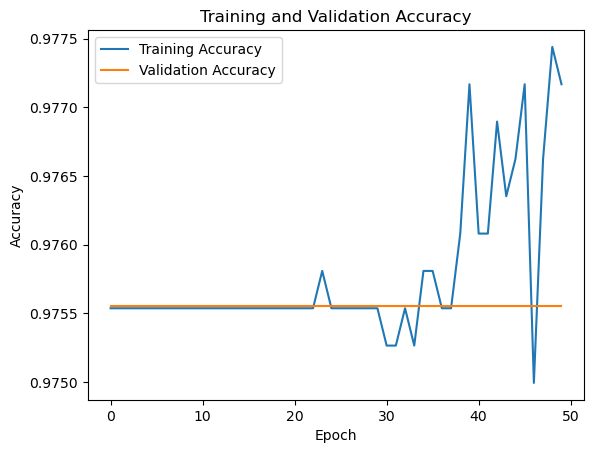

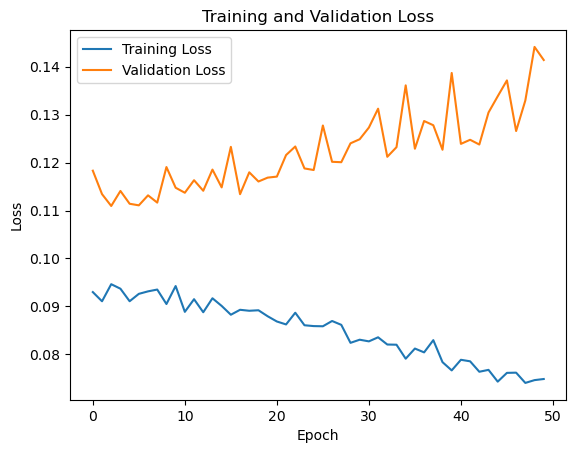

In [48]:
import matplotlib.pyplot as plt

# Train the hybrid model
history = hybrid_model.fit([X_train_reshaped, X_train_preprocessed], y_train, epochs=50, batch_size=64, validation_split=0.1)

# Plot training and validation accuracy
plt.plot(history.history['accuracy'], label='Training Accuracy')
plt.plot(history.history['val_accuracy'], label='Validation Accuracy')
plt.xlabel('Epoch')
plt.ylabel('Accuracy')
plt.legend()
plt.title('Training and Validation Accuracy')
plt.show()

# Plot training and validation loss
plt.plot(history.history['loss'], label='Training Loss')
plt.plot(history.history['val_loss'], label='Validation Loss')
plt.xlabel('Epoch')
plt.ylabel('Loss')
plt.legend()
plt.title('Training and Validation Loss')
plt.show()
